<a href="https://colab.research.google.com/github/ducsuibot/dl_basic/blob/main/d%E1%BB%B1_%C4%91o%C3%A1n_%E1%BA%A3nh_m%C3%A8o_version_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy

In [157]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x = np.array(train_dataset["train_set_x"][:]) # load toàn bộ features trong tập training
    train_set_y = np.array(train_dataset["train_set_y"][:]) # load toàn bộ labels trong tập training

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x = np.array(test_dataset["test_set_x"][:]) # load toàn bộ features trong tập training
    test_set_y = np.array(test_dataset["test_set_y"][:]) # load toàn bộ labels trong tập training
    print(test_set_y)
    classes = np.array(test_dataset["list_classes"][:]) # load danh sách classes (ghi is cat và non cat)

    train_set_y = train_set_y.reshape((1, train_set_y.shape[0])) #réhape Nếu ban đầu nó là một mảng 1D (ví dụ: [0, 1, 0, ...]), thì sau khi reshape nó sẽ trở thành một mảng 2D với 1 hàng và số cột bằng số lượng nhãn (ví dụ: [[0, 1, 0, ...]]
    test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))
    print(test_set_y)

    return train_set_x, train_set_y, test_set_x, test_set_y, classes

In [158]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0
 1 0 0 1 1 1 0 0 0 1 1 1 0]
[[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0
  0 1 0 0 1 1 1 0 0 0 1 1 1 0]]


moi anh 64x64 pixel

In [159]:

print(train_set_x_orig)

[[[[ 17  31  56]
   [ 22  33  59]
   [ 25  35  62]
   ...
   [  1  28  57]
   [  1  26  56]
   [  1  22  51]]

  [[ 25  36  62]
   [ 28  38  64]
   [ 30  40  67]
   ...
   [  1  27  56]
   [  1  25  55]
   [  2  21  51]]

  [[ 32  40  67]
   [ 34  42  69]
   [ 35  42  70]
   ...
   [  1  25  55]
   [  0  24  54]
   [  1  21  51]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[196 192 190]
   [193 186 182]
   [188 179 174]
   ...
   [ 90 142 200]
   [ 90 142 201]
   [ 90 142 201]]

  [[230 229 229]
   [204 199 197]
   [193 186 181]
   ...
   [ 91 143 201]
   [ 91 143 201]
   [ 91 143 201]]

  [[232 225 224]
   [235 234 234]
   [208 205 202]
   ...
   [ 91 144 202]
   [ 91 144 202]
   [ 92 144

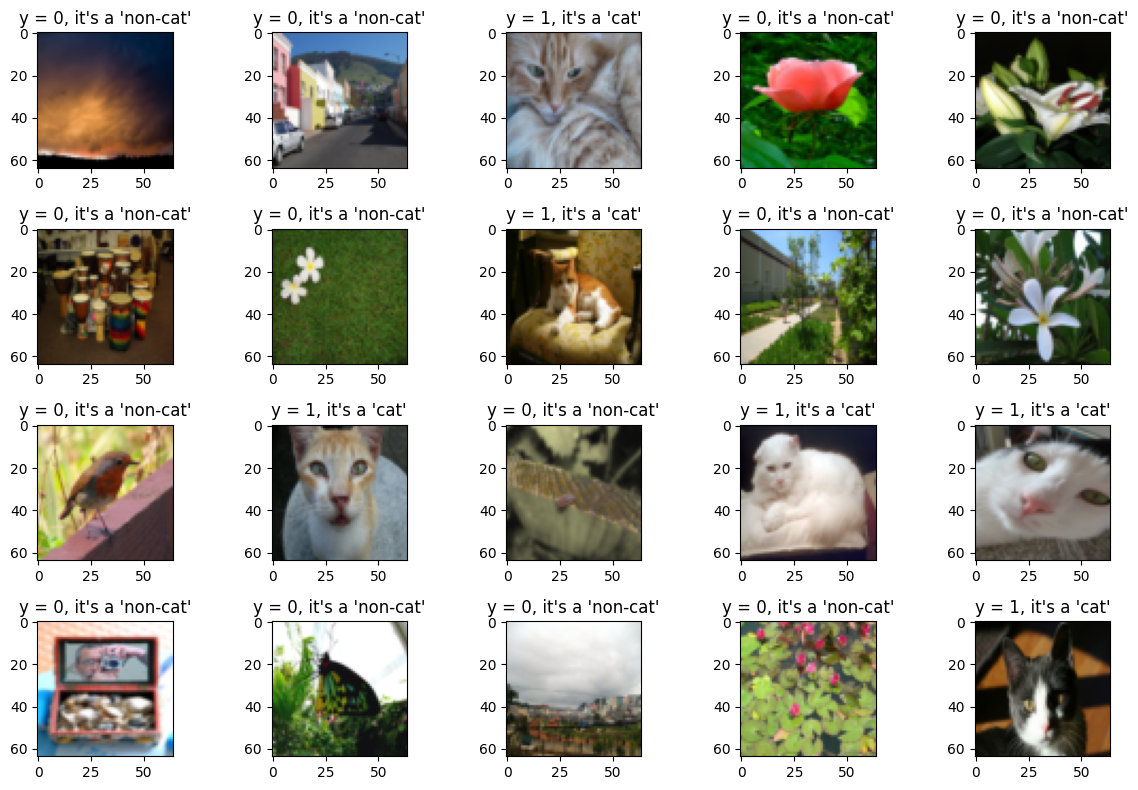

In [160]:
plt.figure(figsize=(12, 8)) # Tùy chỉnh kích thước tổng thể của figure

for i in range(20):
    index = i
    plt.subplot(4, 5, i +1) # Tạo lưới 2 hàng, 5 cột; chọn ô thứ i+1
    plt.imshow(train_set_x_orig[index].astype(np.uint8)) # Chắc chắn dữ liệu ảnh là uint8 nếu cần

    label = classes[np.squeeze(train_set_y[:, index])].decode("utf-8")
    plt.title(f"y = {train_set_y[:, index][0]}, it's a '{label}'")

plt.tight_layout() # Điều chỉnh khoảng cách giữa các subplot
plt.show() # Hiển thị tất cả các figure đã tạo

In [161]:
#(≈ 3 lines of code)
# m_train =
# m_test =
# num_px =
# YOUR CODE STARTS HERE
m_train=train_set_x_orig.shape[0]
m_test =test_set_x_orig.shape[0]
num_px=train_set_x_orig.shape[1]
# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


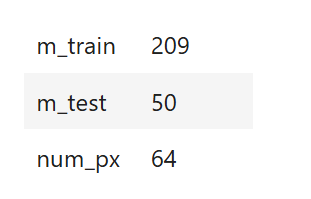

In [162]:
# Reshape the training and test examples
#(≈ 2 lines of code)
# train_set_x_flatten = ...
# test_set_x_flatten = ...
# YOUR CODE STARTS HERE
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3],train_set_x_orig.shape[0])
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*test_set_x_orig.shape[3],test_set_x_orig.shape[0])

# YOUR CODE ENDS HERE

# Check that the first 10 pixels of the second image are in the correct place
#assert np.alltrue(train_set_x_flatten[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213]), "Wrong solution. Use (X.shape[0], -1).T."
#assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159]), "Wrong solution. Use (X.shape[0], -1).T."

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


chuan hoa du lieu

In [163]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [164]:
print(train_set_x.shape)
print(train_set_x)

(12288, 209)
[[0.06666667 0.12156863 0.21960784 ... 0.26666667 0.12941176 0.16078431]
 [0.27843137 0.13333333 0.17254902 ... 0.18431373 0.30196078 0.15686275]
 [0.19215686 0.30980392 0.15686275 ... 0.14901961 0.18039216 0.29411765]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


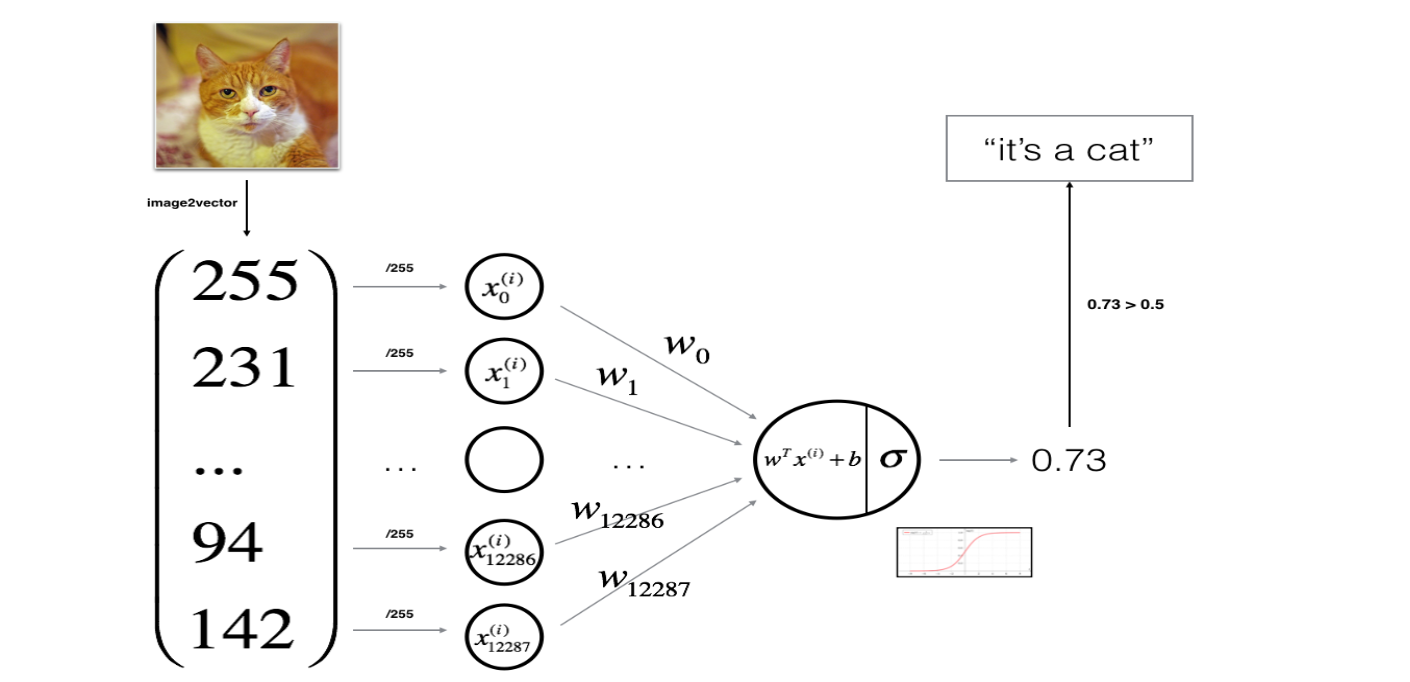

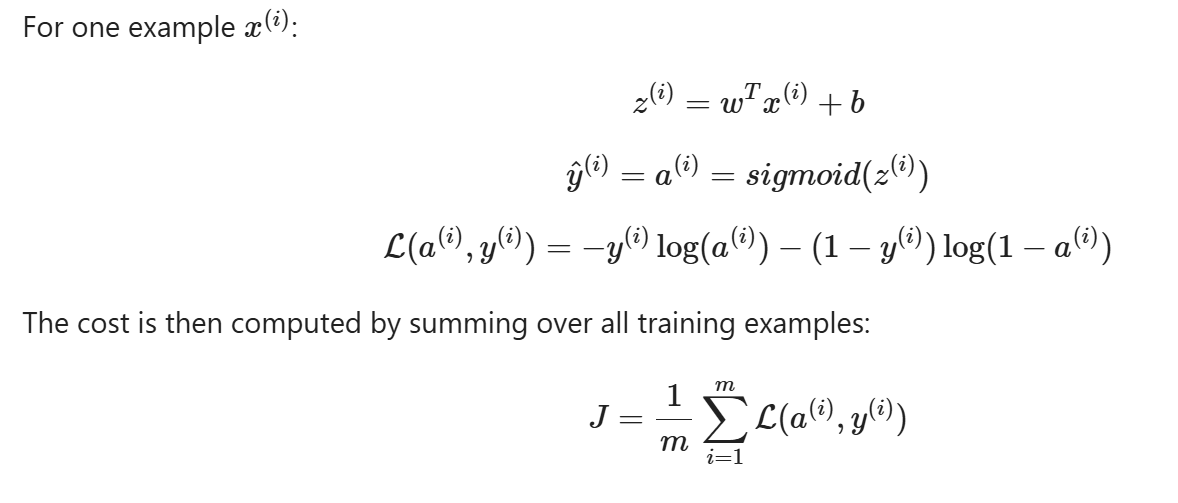

neural network

In [165]:
def sigmoid(z):
  return 1.0/(1+np.exp(-z))

Initializing parameters 0

In [166]:
def initialize_with_zeros(dim):
  w = np.zeros((dim,1))
  b = 0.0
  return w,b

In [167]:
w,b=initialize_with_zeros(12288)
print(w.shape,w.shape[1])

(12288, 1) 1


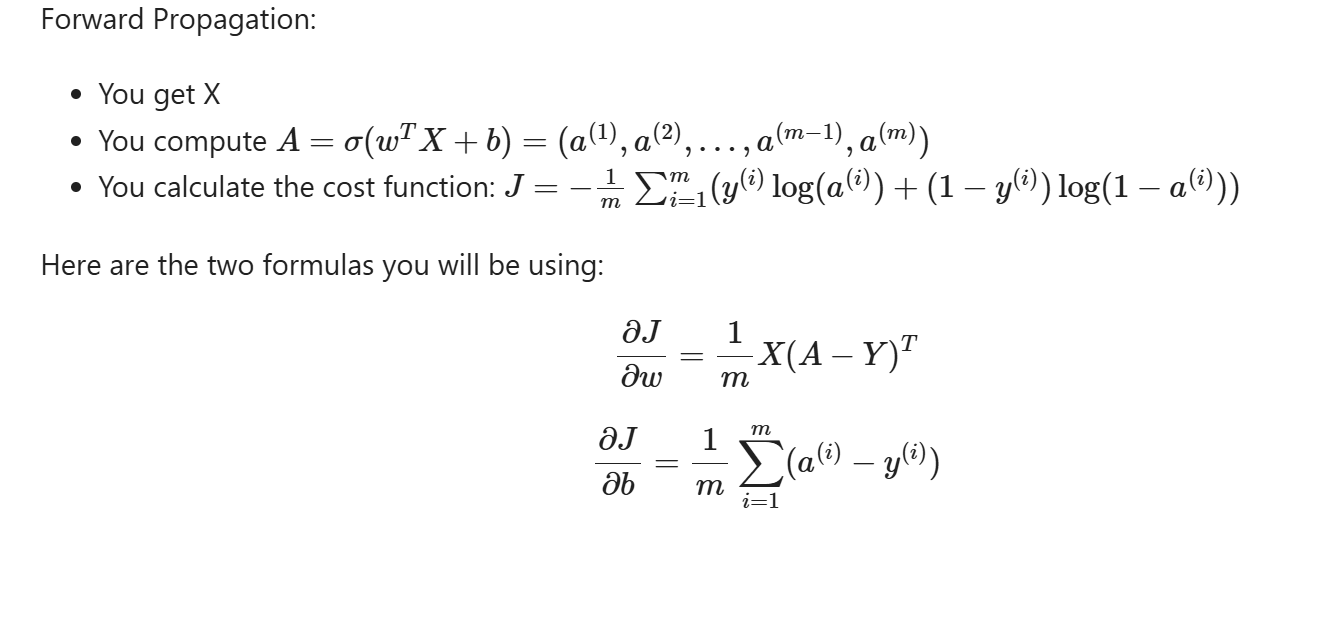

In [168]:
def propagate(w, b, X, Y):
   """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
   m = X.shape[1] # Số lượng cặp (x,y) bị ném vào training
   A = sigmoid(np.dot(w.T,X)+b)
   cost = -1 * np.sum((Y*np.log(A)+(1-Y)*np.log(1-A))/m)
   dw = np.dot(X, (A-Y).T)/m
   db = np.sum(A-Y)/m
   cost = np.squeeze(np.array(cost))
   grads = {"dw": dw,             "db": db}

   return grads, cost

In [169]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation
        # grads, cost = ...
        # YOUR CODE STARTS HERE
        grads, cost = propagate(w, b, X, Y)

        # YOUR CODE ENDS HERE

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (≈ 2 lines of code)
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE
        w = w - learning_rate*dw
        b = b - learning_rate*db
        # YOUR CODE ENDS HERE

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [170]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    A = sigmoid(np.dot(w.T,X)+b)

    # YOUR CODE ENDS HERE

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] =
        # else:
        #     Y_prediction[0,i] =
        # YOUR CODE STARTS HERE
        if A[0, i] > 0.5 :
            Y_prediction[0,i] = 1;
        else:
            Y_prediction[0,i] = 0

        # YOUR CODE ENDS HERE

    return Y_prediction

In [171]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """
    # (≈ 1 line of code)
    # initialize parameters with zeros
    # w, b = ...

    #(≈ 1 line of code)
    # Gradient descent
    # params, grads, costs = ...

    # Retrieve parameters w and b from dictionary "params"
    # w = ...
    # b = ...

    # Predict test/train set examples (≈ 2 lines of code)
    # Y_prediction_test = ...
    # Y_prediction_train = ...

    # YOUR CODE STARTS HERE
    w,b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w,b,X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    # YOUR CODE ENDS HERE

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [172]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.709726
Cost after iteration 200: 0.657712
Cost after iteration 300: 0.614611
Cost after iteration 400: 0.578001
Cost after iteration 500: 0.546372
Cost after iteration 600: 0.518331
Cost after iteration 700: 0.492852
Cost after iteration 800: 0.469259
Cost after iteration 900: 0.447139
Cost after iteration 1000: 0.426262
Cost after iteration 1100: 0.406617
Cost after iteration 1200: 0.388723
Cost after iteration 1300: 0.374678
Cost after iteration 1400: 0.365826
Cost after iteration 1500: 0.358532
Cost after iteration 1600: 0.351612
Cost after iteration 1700: 0.345012
Cost after iteration 1800: 0.338704
Cost after iteration 1900: 0.332664
train accuracy: 91.38755980861244 %
test accuracy: 34.0 %


y = 1, you predicted that it is a "non-cat" picture.


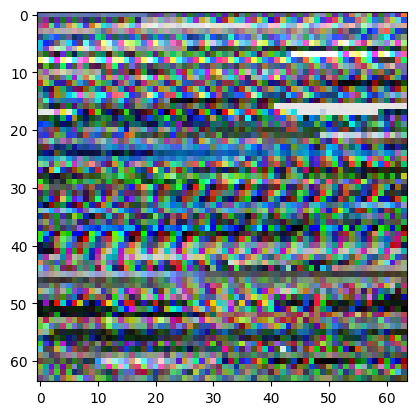

In [173]:
index = 2
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

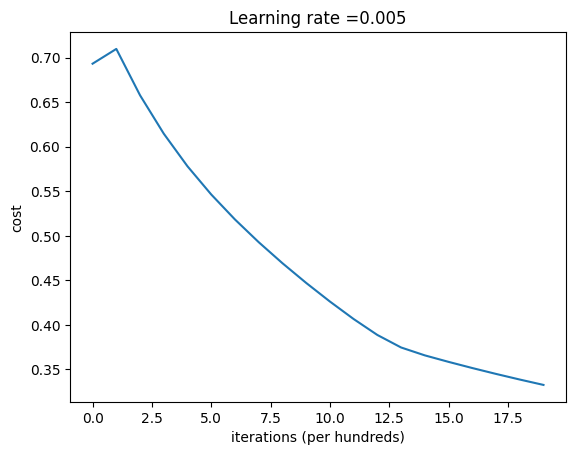

In [174]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

y = 0.0, your algorithm predicts a "non-cat" picture.


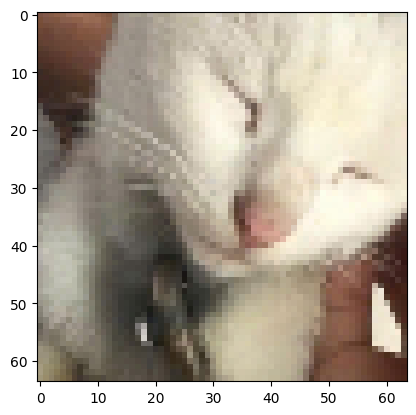

In [176]:
# change this to the name of your image file
my_image = "my_image.jpg"

# We preprocess the image to fit your algorithm.
image = np.array(Image.open(my_image).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

mô hình sự đoán ko khớp với độ tin cậy thấp => cải thiện sau